### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

#### 1. Read the data as an appropriate Time Series data and plot the data. - 2 points

In [547]:
df=pd.read_csv("Sparkling.csv")

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [549]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [550]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


Monthly data available from 1980 to 1995.

In [551]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [552]:
df=pd.read_csv("Sparkling.csv",parse_dates=["YearMonth"])
df.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

In [553]:
df.set_index("YearMonth",inplace=True)

In [554]:
# checking null values
df.isnull().value_counts()

Sparkling
False        187
dtype: int64

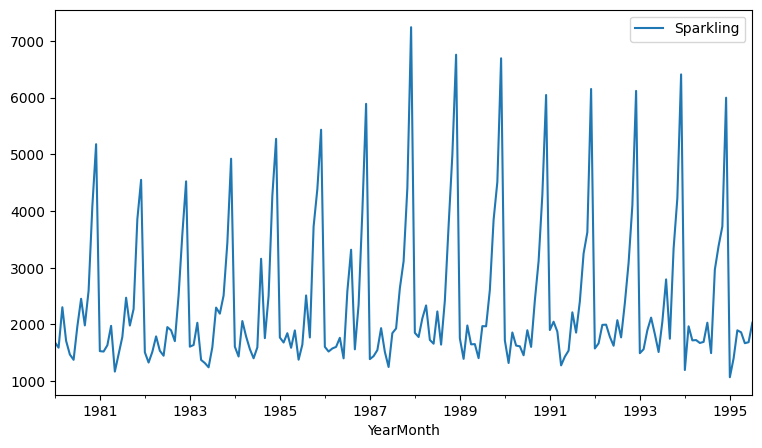

In [555]:
# plotting rose.csv
from pylab import rcParams
rcParams['figure.figsize']=9,5
df.plot();

No missing values found.

#### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition. - 9 points

In [556]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


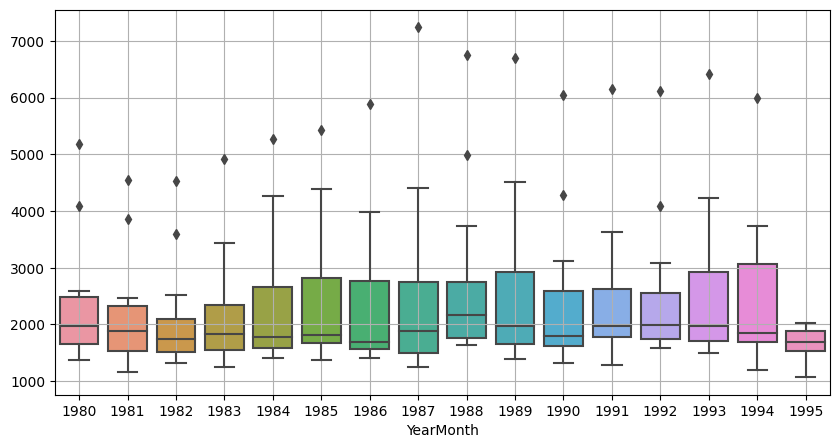

In [557]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.grid();

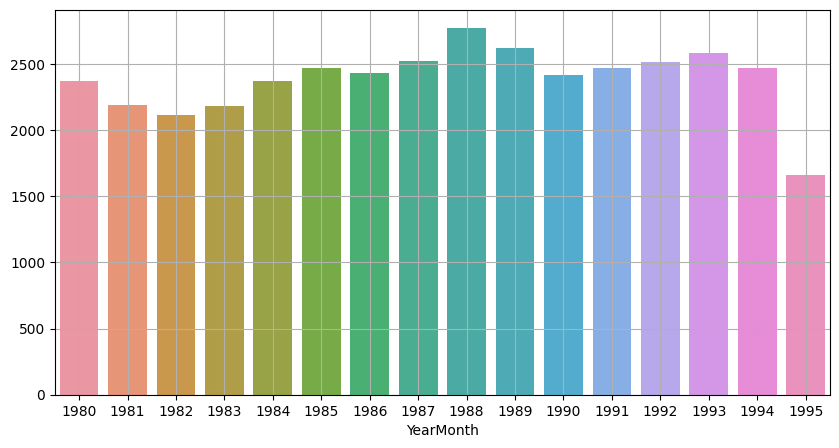

In [558]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x=df.index.year,y=df.values[:,0],ax=ax,ci=False)
plt.grid();

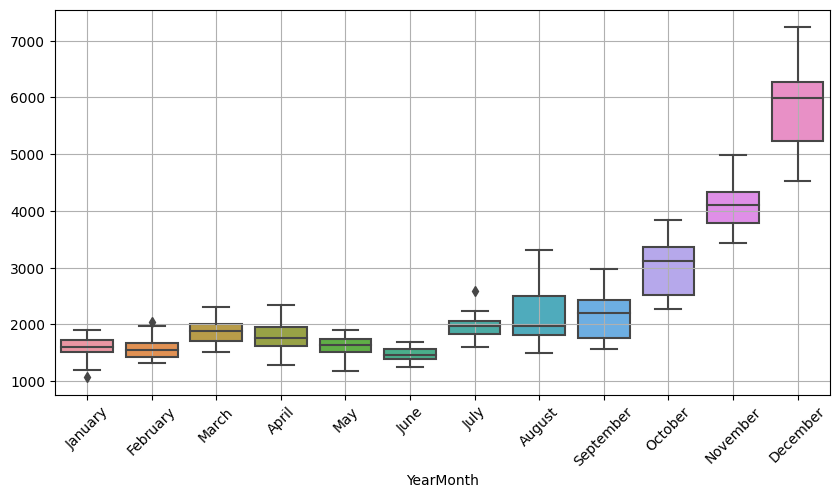

In [559]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.xticks(rotation=45)
plt.grid();

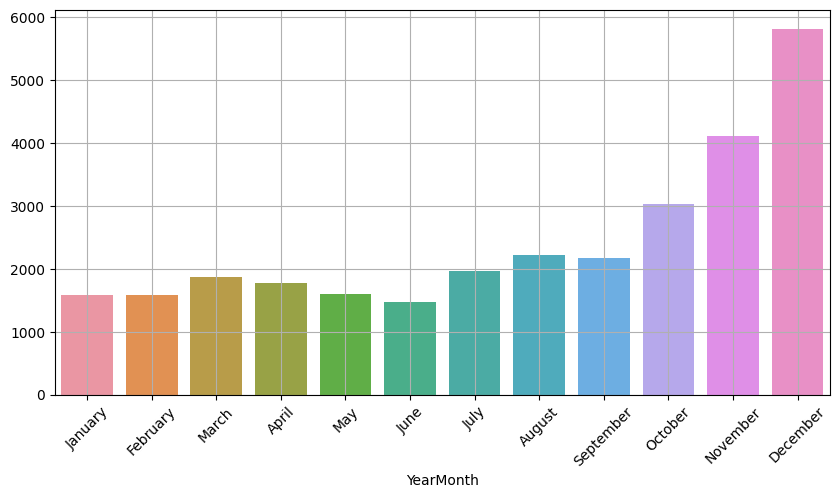

In [560]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x=df.index.month_name(),y=df.values[:,0],ax=ax,ci=False)
plt.xticks(rotation=45)
plt.grid();

In [561]:
sales_by_monthyear=pd.pivot_table(df,values='Sparkling',columns=df.index.month_name(),index=df.index.year)
round(sales_by_monthyear)

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


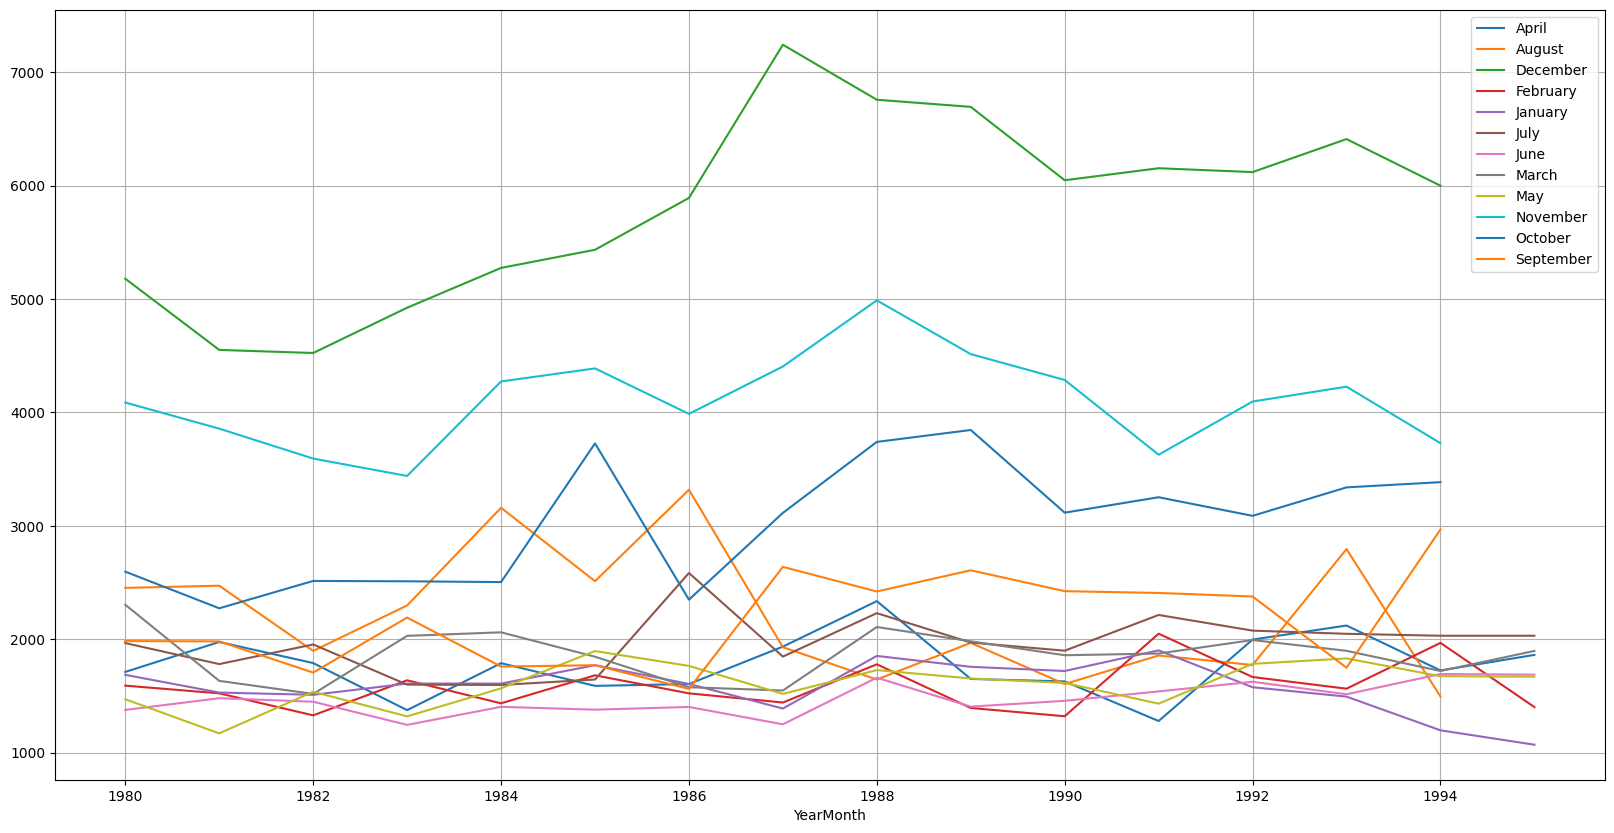

In [562]:
sales_by_monthyear.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [563]:
sales_by_yearmonth=pd.pivot_table(df,values='Sparkling',columns=df.index.year,index=df.index.month)
round(sales_by_yearmonth)

YearMonth,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
YearMonth,,,,,,,,,,,,,,,,
1,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
2,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
3,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
4,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
5,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
6,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
7,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
8,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
9,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


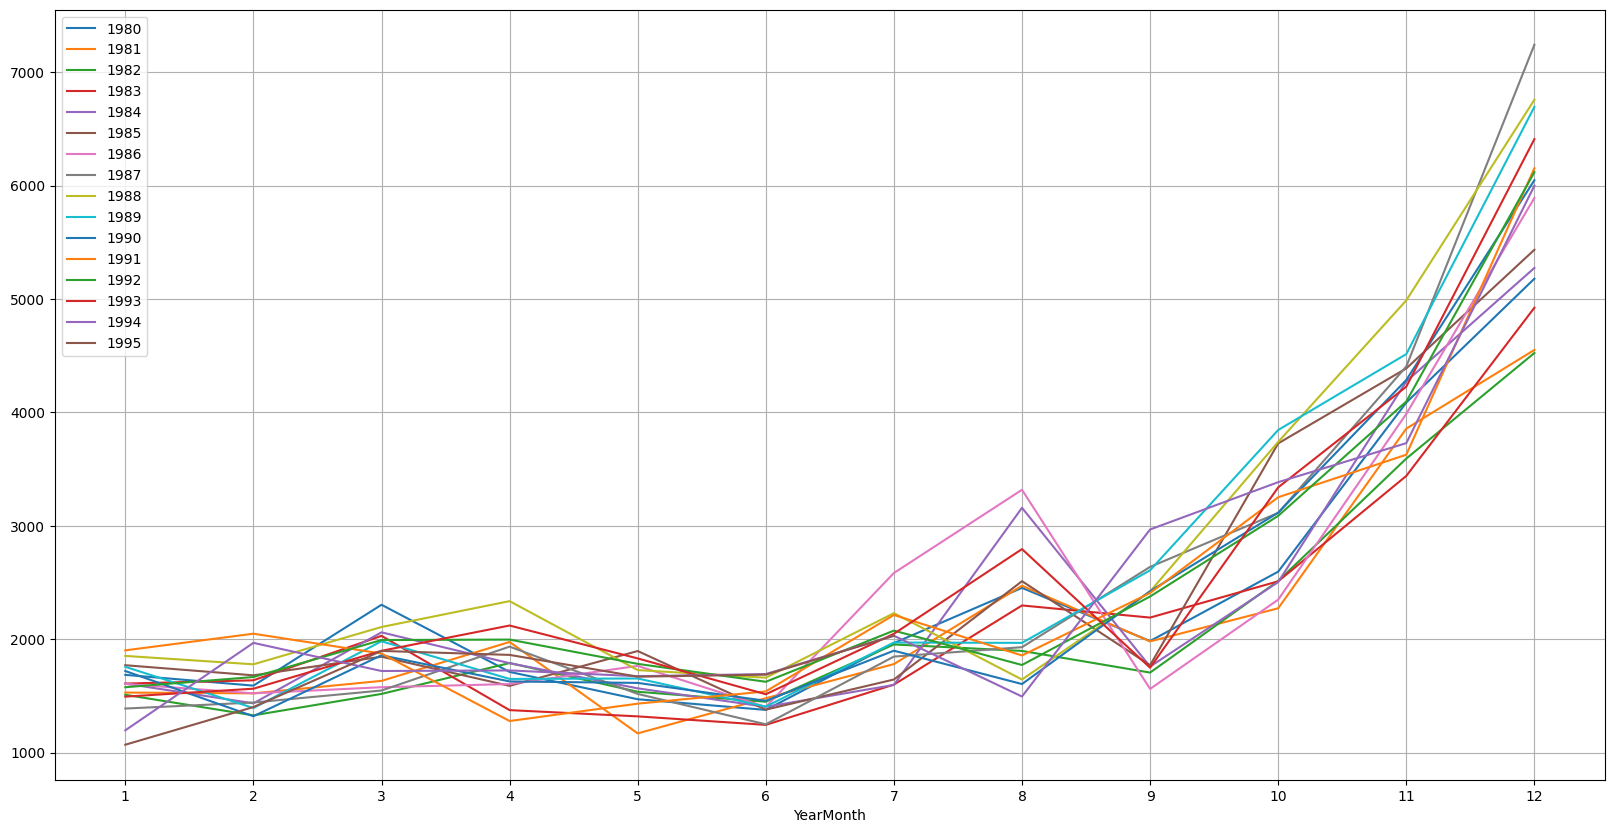

In [564]:
sales_by_yearmonth.plot(figsize=(20,10))
plt.grid()
plt.xticks(np.arange(1,13))
plt.legend(loc='best');

When analysing the data yearly, 1988 has the highest number of sales for Sparkling wine. Although, unlike Rose wine, Sparkling wine is relatively more uniformly sold throughout the years.

When comparing months, December has the highest number of sales for Sparkling wine, same as Rose wine.

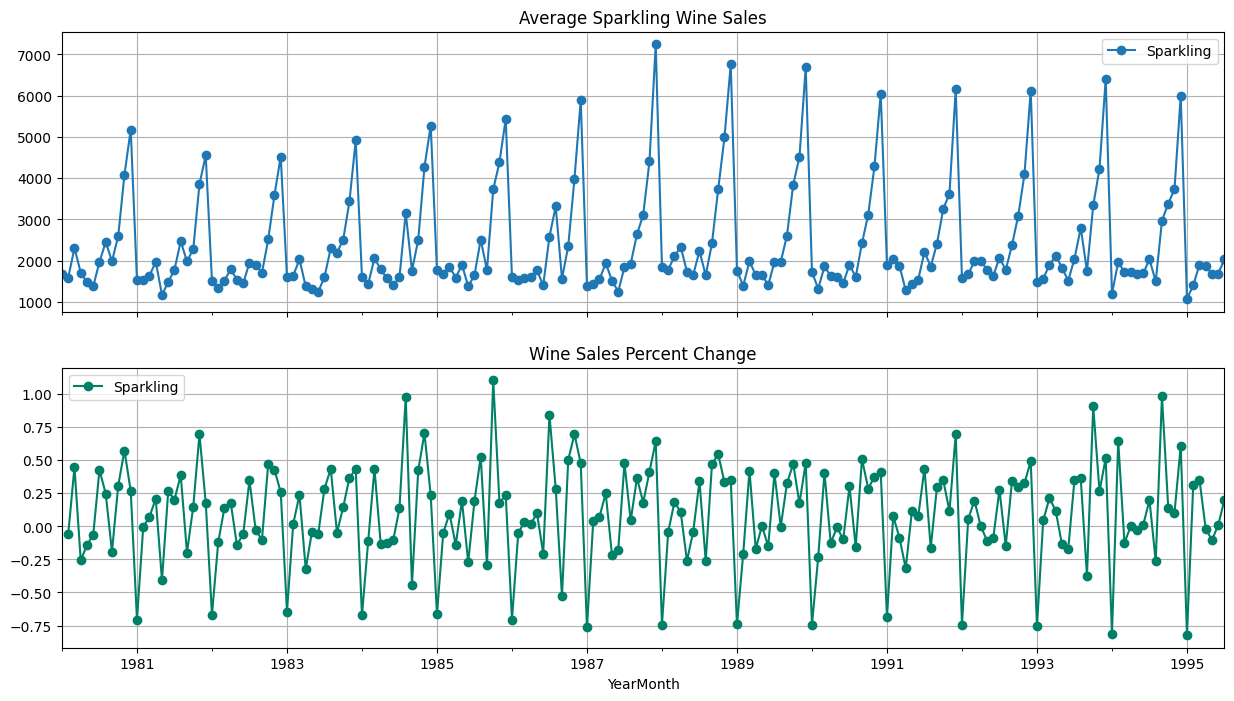

In [565]:
average=df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig,(axis1,axis2)=plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Wine Sales Percent Change",grid=True)

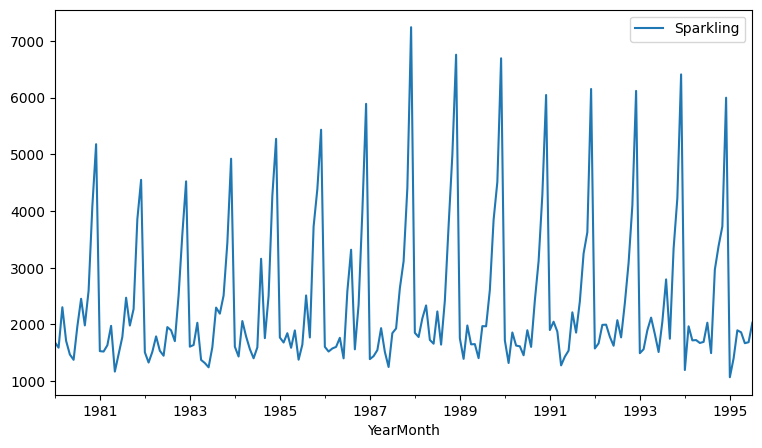

In [566]:
rcParams['figure.figsize']=9,5
df.plot();

In [567]:
# exploratory data analysis on sparkling.csv
df_as=seasonal_decompose(df,model='additive')

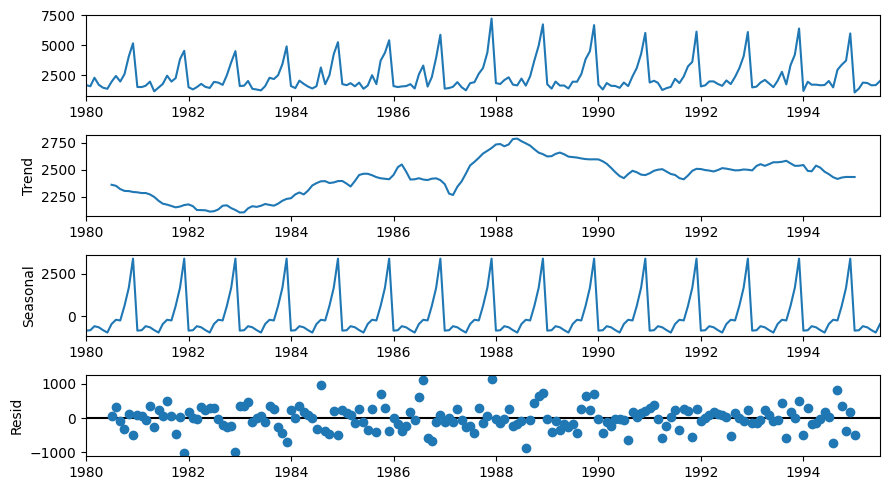

In [568]:
df_as.plot();

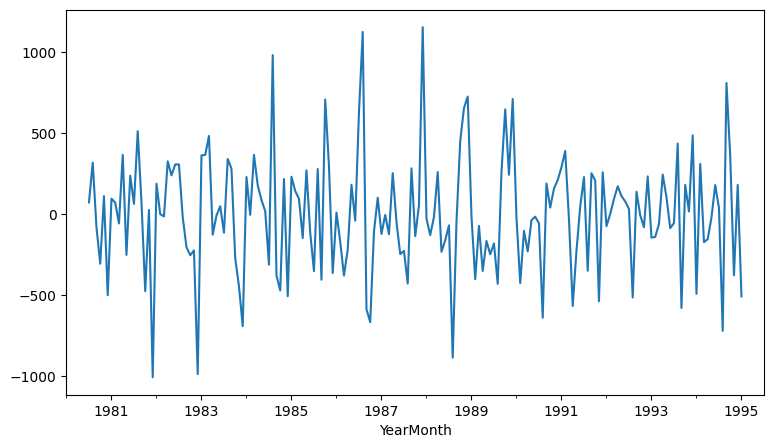

In [569]:
df_as.resid.plot();

In [570]:
df_ms=seasonal_decompose(df,model='multiplicative')

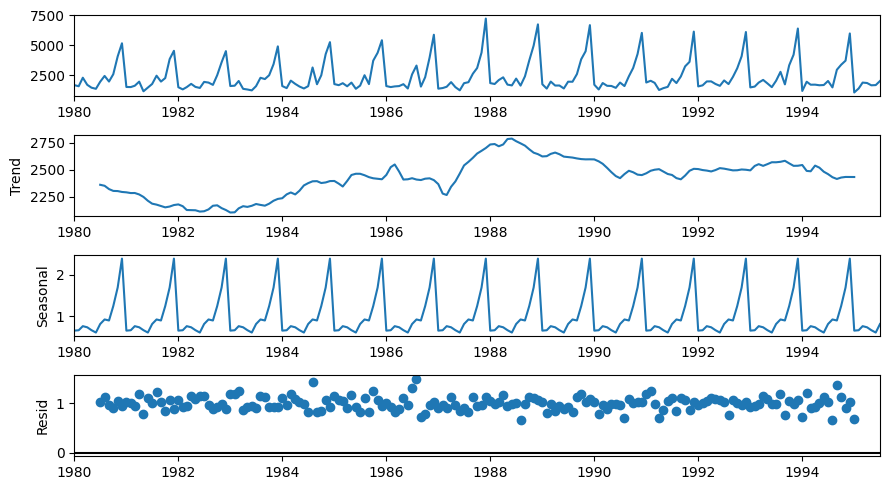

In [571]:
df_ms.plot();

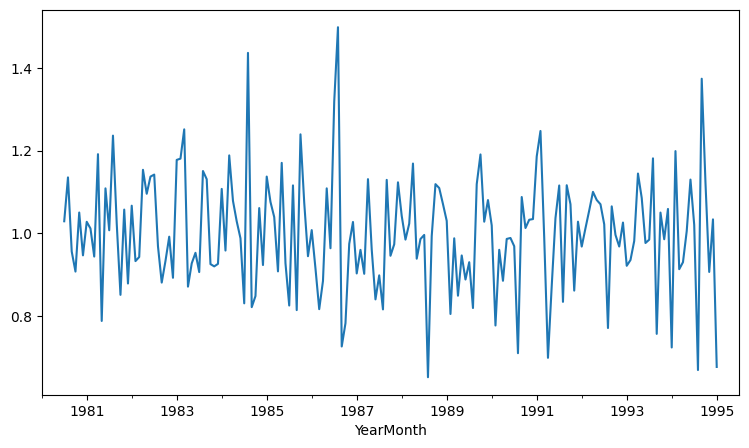

In [572]:
df_ms.resid.plot();

In [573]:
df_ms.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [574]:
df_ms.trend['1980-06-01':'1995-02-01']

YearMonth
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
                 ...     
1994-10-01    2428.041667
1994-11-01    2433.583333
1994-12-01    2433.208333
1995-01-01    2433.000000
1995-02-01            NaN
Name: trend, Length: 177, dtype: float64

In [575]:
df_ms.seasonal

YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
                ...   
1995-03-01    0.757440
1995-04-01    0.730351
1995-05-01    0.660609
1995-06-01    0.603468
1995-07-01    0.809164
Name: seasonal, Length: 187, dtype: float64

In [576]:
df_ms.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

In [577]:
df_ms.resid['1980-06-01':'1995-02-01']

YearMonth
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
                ...   
1994-10-01    1.122677
1994-11-01    0.906607
1994-12-01    1.033837
1995-01-01    0.676758
1995-02-01         NaN
Name: resid, Length: 177, dtype: float64

In [578]:
df['1980-07-01':'1980-07-01']

,Sparkling
YearMonth,
1980-07-01,1966


In [579]:
df_ms.trend['1980-07-01']*df_ms.seasonal['1980-07-01']*df_ms.resid['1980-07-01']

1966.0000000000002

Both, multiplicative and additive seasonality is showing random pattern in residuals. Therefore, additive seasonality can be used to decompose the time series.

#### 3. Split the data into training and test. The test data should start in 1991. - 2 points

In [580]:
train=df[df.index<'1991-01-01']
test=df[df.index>='1991-01-01']

In [581]:
train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [582]:
test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [583]:
train.shape

(132, 1)

In [584]:
test.shape

(55, 1)

#### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. 

#### Other models such as regression, naïve forecast models and simple average models should also be built on the training data and check the performance on the test data using RMSE. - 16 points

In [585]:
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from IPython.display import display

In [586]:
model_SES=SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit=model_SES.fit(optimized=True)

In [587]:
model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [588]:
SES_predict=model_SES_autofit.forecast(steps=len(test))
SES_predict.head()

1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
Freq: MS, dtype: float64

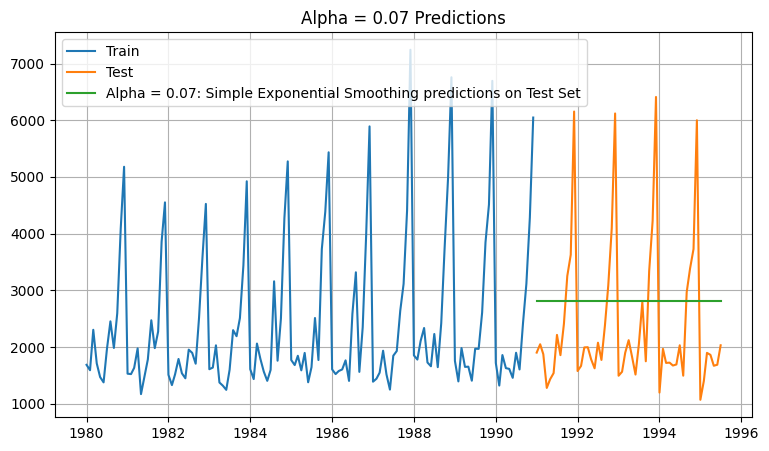

In [589]:
# comparing actual data and predicted values with simple exponential smoothing with no trend and seasonality
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha = 0.07: Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07 Predictions');

In [590]:
df_result_ses=pd.DataFrame({'Test RMSE':[em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.07; SES'])
df_result_ses

,Test RMSE
Alpha=0.07; SES,1338.008384


In [591]:
# double exponential smoothing OR Holt's model
model_DES=Holt(train,initialization_method='estimated')
model_DES_autofit=model_DES.fit()
print('')
print('Holt model Exponential Smoothing Estimated Parameters:')
model_DES_autofit.params


Holt model Exponential Smoothing Estimated Parameters:


{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999991,
 'initial_trend': 74.87272727272739,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [592]:
DES_predict=model_DES_autofit.forecast(len(test))
DES_predict.head()

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
Freq: MS, dtype: float64

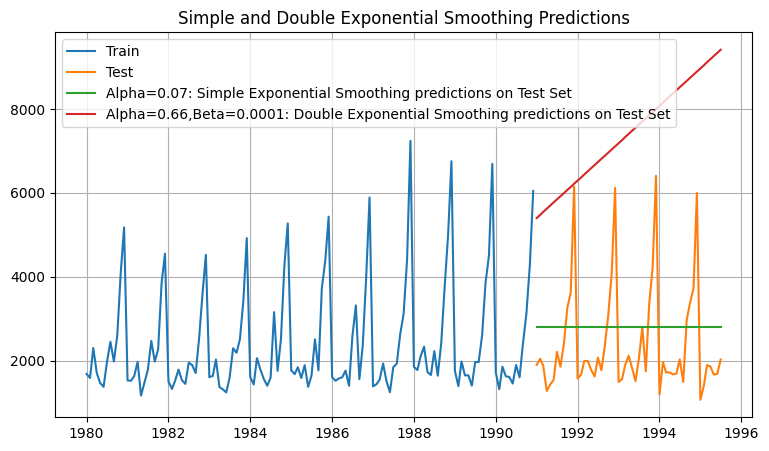

In [593]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha=0.07: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001: Double Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [594]:
result_des_temp=pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.66, Beta=0.0001; DES'])
df_result_des=pd.concat([df_result_ses,result_des_temp])
df_result_des

,Test RMSE
Alpha=0.07; SES,1338.008384
"Alpha=0.66, Beta=0.0001; DES",5291.879833


In [595]:
# Holt-Winters model
model_TES=ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_autofit=model_TES.fit()

In [596]:
model_TES_autofit.params

{'smoothing_level': 0.11127227248079453,
 'smoothing_trend': 0.012360804305088534,
 'smoothing_seasonal': 0.46071766688111543,
 'damping_trend': nan,
 'initial_level': 2356.577980956387,
 'initial_trend': -0.10243675533021725,
 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
        -808.42473284, -815.34991402, -384.23065038,   72.99484403,
        -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [597]:
TES_predict=model_TES_autofit.forecast(len(test))
TES_predict.head()

1991-01-01    1490.402890
1991-02-01    1204.525152
1991-03-01    1688.734182
1991-04-01    1551.226125
1991-05-01    1461.197883
Freq: MS, dtype: float64

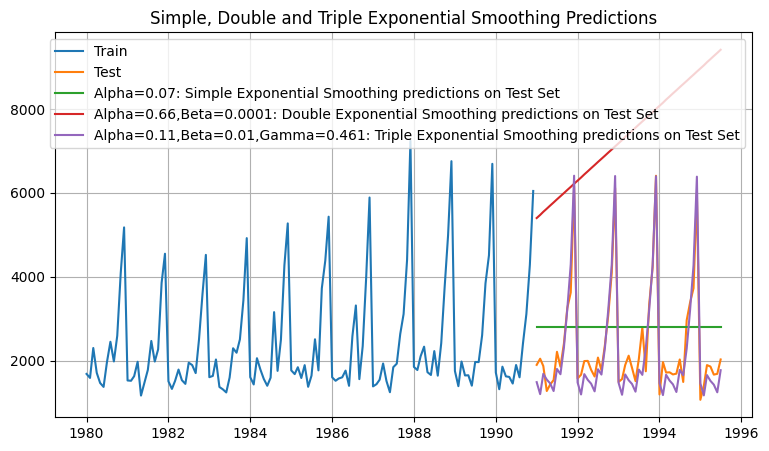

In [598]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha=0.07: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001: Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.11,Beta=0.01,Gamma=0.461: Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [599]:
result_tes_temp=pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.11, Beta=0.01, Gamma=0.461; TES'])
df_result_tes=pd.concat([df_result_des,result_tes_temp])
df_result_tes

,Test RMSE
Alpha=0.07; SES,1338.008384
"Alpha=0.66, Beta=0.0001; DES",5291.879833
"Alpha=0.11, Beta=0.01, Gamma=0.461; TES",378.951023


In [600]:
# triple exponential smoothing (multiplicative) Holt-Winters model
model_TESM=ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
model_TESM_autofit=model_TESM.fit()

In [601]:
model_TESM_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [602]:
TESM_predict=model_TESM_autofit.forecast(len(test))
TESM_predict.head()

1991-01-01    1587.497468
1991-02-01    1356.394925
1991-03-01    1762.929755
1991-04-01    1656.165933
1991-05-01    1542.002730
Freq: MS, dtype: float64

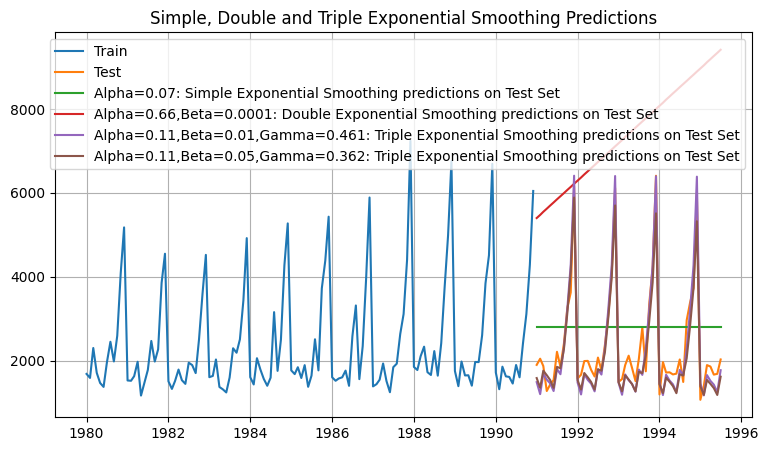

In [603]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha=0.07: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001: Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.11,Beta=0.01,Gamma=0.461: Triple Exponential Smoothing predictions on Test Set')
plt.plot(TESM_predict, label='Alpha=0.11,Beta=0.05,Gamma=0.362: Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple, Double and Triple Exponential Smoothing Predictions');

In [604]:
result_tesm_temp=pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TESM_predict.values,squared=False)]}
                           ,index=['Alpha=0.11, Beta=0.05, Gamma=0.362; TES'])
df_result_tesm=pd.concat([df_result_tes,result_tesm_temp])
df_result_tesm

,Test RMSE
Alpha=0.07; SES,1338.008384
"Alpha=0.66, Beta=0.0001; DES",5291.879833
"Alpha=0.11, Beta=0.01, Gamma=0.461; TES",378.951023
"Alpha=0.11, Beta=0.05, Gamma=0.362; TES",404.286809


In [605]:
from sklearn.linear_model import LinearRegression
# regression model

# creating time instances for test and train data to build the regression model
train_time=[i+1 for i in range(len(train))]
test_time=[i+133 for i in range(len(test))]
print('Train Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Train Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [606]:
lr_train=train.copy()
lr_test=test.copy()

In [607]:
lr_train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [608]:
lr_test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [609]:
lr_train['Time']=train_time
lr_test['Time']=test_time

In [610]:
lr_train.head()

,Sparkling,Time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


In [611]:
lr_test.head()

,Sparkling,Time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137


In [612]:
lr=LinearRegression()
lr_model=lr.fit(lr_train[['Time']],lr_train['Sparkling'])

In [613]:
lr_train[['Time']]

,Time
YearMonth,
1980-01-01,1
1980-02-01,2
1980-03-01,3
1980-04-01,4
1980-05-01,5
...,...
1990-08-01,128
1990-09-01,129
1990-10-01,130


In [614]:
lr_train['Sparkling']

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
              ... 
1990-08-01    1605
1990-09-01    2424
1990-10-01    3116
1990-11-01    4286
1990-12-01    6047
Name: Sparkling, Length: 132, dtype: int64

In [615]:
from sklearn import metrics

In [616]:
lr_train_pred=lr_model.predict(lr_train[['Time']])
lr_train['RegOnTime']=lr_train_pred
lr_train_pred

array([2021.74117111, 2027.57382961, 2033.40648811, 2039.23914662,
       2045.07180512, 2050.90446362, 2056.73712213, 2062.56978063,
       2068.40243913, 2074.23509763, 2080.06775614, 2085.90041464,
       2091.73307314, 2097.56573164, 2103.39839015, 2109.23104865,
       2115.06370715, 2120.89636565, 2126.72902416, 2132.56168266,
       2138.39434116, 2144.22699966, 2150.05965817, 2155.89231667,
       2161.72497517, 2167.55763367, 2173.39029218, 2179.22295068,
       2185.05560918, 2190.88826769, 2196.72092619, 2202.55358469,
       2208.38624319, 2214.2189017 , 2220.0515602 , 2225.8842187 ,
       2231.7168772 , 2237.54953571, 2243.38219421, 2249.21485271,
       2255.04751121, 2260.88016972, 2266.71282822, 2272.54548672,
       2278.37814522, 2284.21080373, 2290.04346223, 2295.87612073,
       2301.70877923, 2307.54143774, 2313.37409624, 2319.20675474,
       2325.03941325, 2330.87207175, 2336.70473025, 2342.53738875,
       2348.37004726, 2354.20270576, 2360.03536426, 2365.86802

In [617]:
lr_test_pred=lr_model.predict(lr_test[['Time']])
lr_test['RegOnTime']=lr_test_pred
lr_test_pred

array([2791.65209345, 2797.48475196, 2803.31741046, 2809.15006896,
       2814.98272746, 2820.81538597, 2826.64804447, 2832.48070297,
       2838.31336147, 2844.14601998, 2849.97867848, 2855.81133698,
       2861.64399548, 2867.47665399, 2873.30931249, 2879.14197099,
       2884.9746295 , 2890.807288  , 2896.6399465 , 2902.472605  ,
       2908.30526351, 2914.13792201, 2919.97058051, 2925.80323901,
       2931.63589752, 2937.46855602, 2943.30121452, 2949.13387302,
       2954.96653153, 2960.79919003, 2966.63184853, 2972.46450703,
       2978.29716554, 2984.12982404, 2989.96248254, 2995.79514104,
       3001.62779955, 3007.46045805, 3013.29311655, 3019.12577506,
       3024.95843356, 3030.79109206, 3036.62375056, 3042.45640907,
       3048.28906757, 3054.12172607, 3059.95438457, 3065.78704308,
       3071.61970158, 3077.45236008, 3083.28501858, 3089.11767709,
       3094.95033559, 3100.78299409, 3106.61565259])

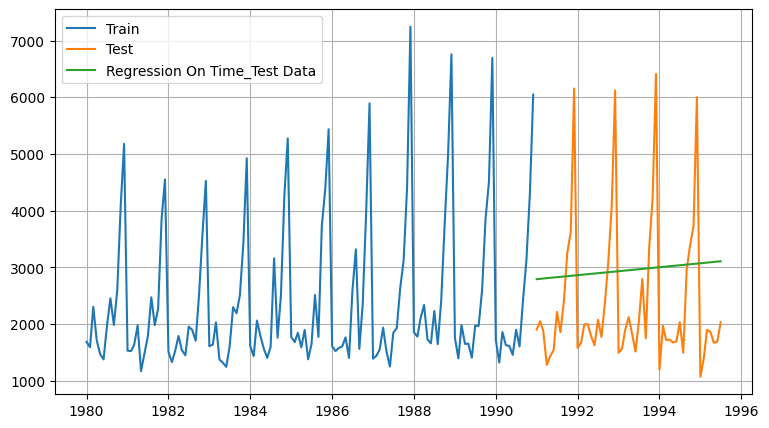

In [618]:
plt.plot( train['Sparkling'],label='Train')
plt.plot(test['Sparkling'],label='Test')
plt.plot(lr_test['RegOnTime'],label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [619]:
# linear regression model evaluation
rmse_lr_test=metrics.mean_squared_error(test['Sparkling'],lr_test_pred,squared=False)
result_lr_test_temp=pd.DataFrame({'Test RMSE': [rmse_lr_test]}
                            ,index=['RegressionOnTime'])
result_lr_test=pd.concat([df_result_tes,result_lr_test_temp])
result_lr_test

,Test RMSE
Alpha=0.07; SES,1338.008384
"Alpha=0.66, Beta=0.0001; DES",5291.879833
"Alpha=0.11, Beta=0.01, Gamma=0.461; TES",378.951023
RegressionOnTime,1389.135175


In [620]:
# naïve forecast model
nm_train=train.copy()
nm_test=test.copy()

In [621]:
nm_test['Naive']=np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
nm_test['Naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: Naive, dtype: int64

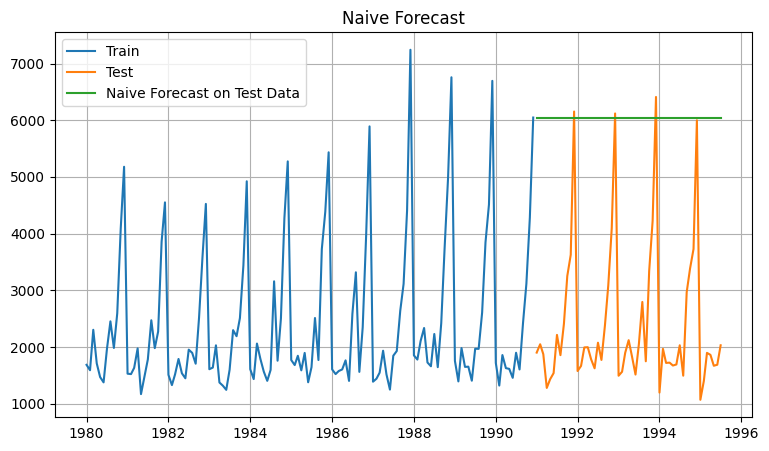

In [622]:
plt.plot(nm_train['Sparkling'],label='Train')
plt.plot(test['Sparkling'],label='Test')

plt.plot(nm_test['Naive'],label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [623]:
# naiive forecast model evaluation
rmse_nm_test=metrics.mean_squared_error(test['Sparkling'],nm_test['Naive'],squared=False)
result_nm_temp=pd.DataFrame({'Test RMSE': [rmse_nm_test]}
                            ,index=['NaiveModel'])
result_nm_test=pd.concat([result_lr_test,result_nm_temp])
result_nm_test

,Test RMSE
Alpha=0.07; SES,1338.008384
"Alpha=0.66, Beta=0.0001; DES",5291.879833
"Alpha=0.11, Beta=0.01, Gamma=0.461; TES",378.951023
RegressionOnTime,1389.135175
NaiveModel,3864.279352


In [624]:
# simple moving average model 1
sa_train=train.copy()
sa_test=test.copy()

In [625]:
sa_test['Mean_Forecast']=train['Sparkling'].mean()
sa_test.head()

,Sparkling,Mean_Forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


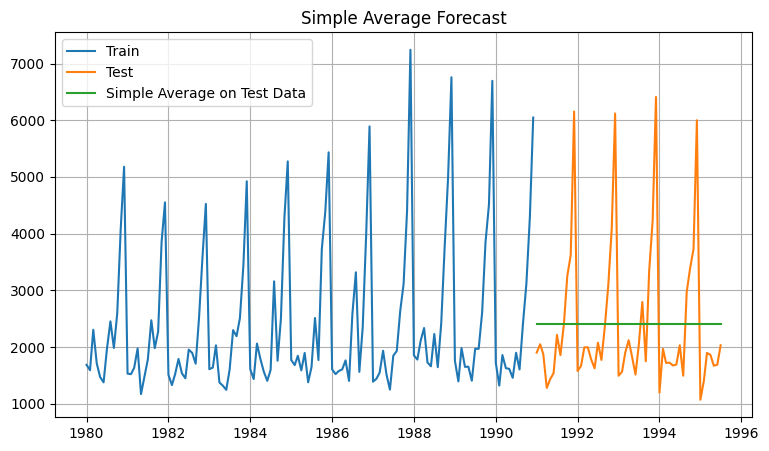

In [626]:
plt.plot(sa_train['Sparkling'],label='Train')
plt.plot(sa_test['Sparkling'],label='Test')
plt.plot(sa_test['Mean_Forecast'],label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [627]:
# simple average model evaluation
rmse_sa_temp=metrics.mean_squared_error(test['Sparkling'],sa_test['Mean_Forecast'],squared=False)
result_sa_temp=pd.DataFrame({'Test RMSE': [rmse_sa_temp]}
                           ,index=['SimpleAverageModel'])
result_sa_test=pd.concat([result_nm_test,result_sa_temp])
result_sa_test

,Test RMSE
Alpha=0.07; SES,1338.008384
"Alpha=0.66, Beta=0.0001; DES",5291.879833
"Alpha=0.11, Beta=0.01, Gamma=0.461; TES",378.951023
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


In [628]:
# moving average model
MovingAverage=df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [629]:
# averaging over the entire dataset with trailing 2,3,6,9
MovingAverage['Trailing_2']= MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4']= MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6']= MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9']= MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN
1980-06-01,1377,1424.0,1716.00,1690.166667,NaN
1980-07-01,1966,1671.5,1631.50,1736.833333,NaN
1980-08-01,2453,2209.5,1816.75,1880.500000,NaN
1980-09-01,1984,2218.5,1945.00,1827.166667,1838.222222


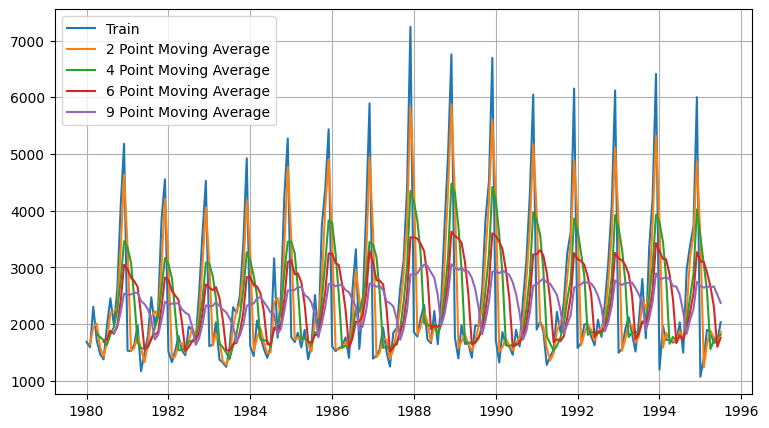

In [630]:
plt.plot(MovingAverage['Sparkling'],label='Train')
plt.plot(MovingAverage['Trailing_2'],label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'],label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label='9 Point Moving Average')
plt.legend(loc='best')
plt.grid();

In [631]:
# splitting the averaged dataset into train and test
trailing_ma_train=MovingAverage[MovingAverage.index<'1991-01-01']
trailing_ma_test=MovingAverage[MovingAverage.index>='1991-01-01']

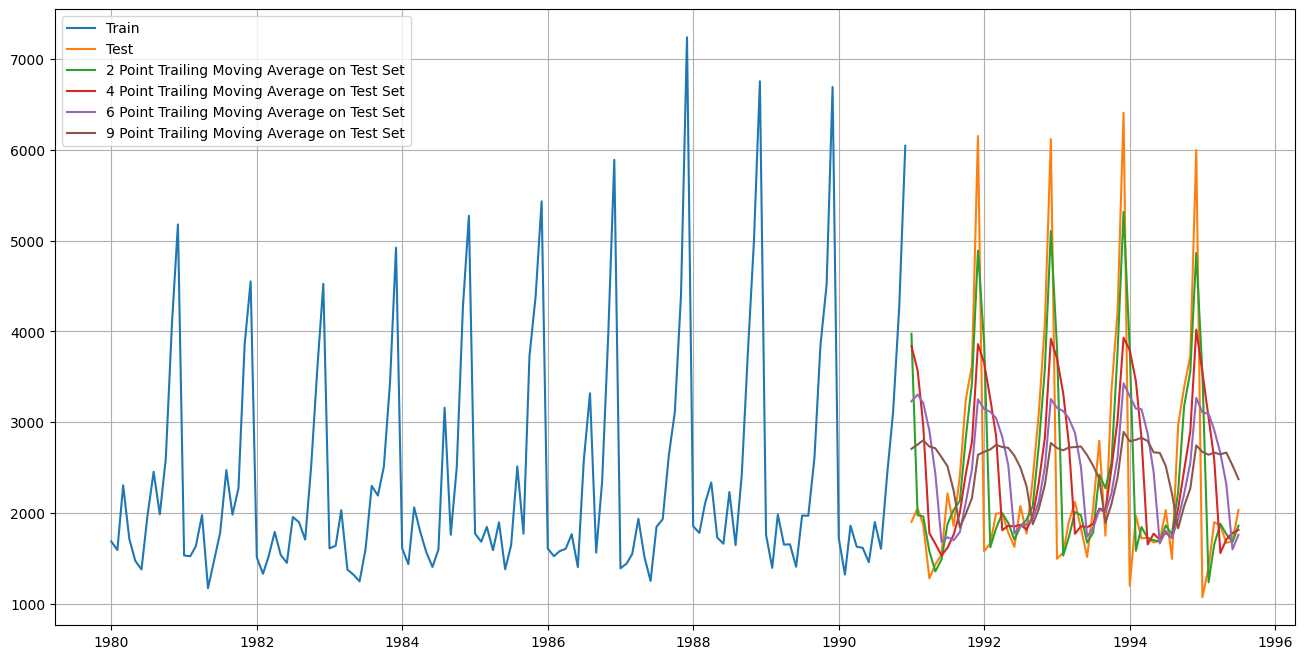

In [632]:
plt.figure(figsize=(16,8))
plt.plot(trailing_ma_train['Sparkling'],label='Train')
plt.plot(trailing_ma_test['Sparkling'],label='Test')
plt.plot(trailing_ma_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_ma_test['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_ma_test['Trailing_6'],label='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_ma_test['Trailing_9'],label='9 Point Trailing Moving Average on Test Set')
plt.legend(loc='best')
plt.grid();

In [633]:
# evaluating the moving average model for all intervals
rmse_trailing2_test=metrics.mean_squared_error(test['Sparkling'],trailing_ma_test['Trailing_2'],squared=False)
rmse_trailing4_test=metrics.mean_squared_error(test['Sparkling'],trailing_ma_test['Trailing_4'],squared=False)
rmse_trailing6_test=metrics.mean_squared_error(test['Sparkling'],trailing_ma_test['Trailing_6'],squared=False)
rmse_trailing9_test=metrics.mean_squared_error(test['Sparkling'],trailing_ma_test['Trailing_9'],squared=False)

In [634]:
result_ma_temp=pd.DataFrame({'Test RMSE': [rmse_trailing2_test,rmse_trailing4_test
                                          ,rmse_trailing6_test,rmse_trailing9_test]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
result_trailing_test= pd.concat([result_sa_test,result_ma_temp])
result_trailing_test

,Test RMSE
Alpha=0.07; SES,1338.008384
"Alpha=0.66, Beta=0.0001; DES",5291.879833
"Alpha=0.11, Beta=0.01, Gamma=0.461; TES",378.951023
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


In [635]:
# RMSE of 2-point trailing moving average is the lowest. Hence, I will include this in the final table
result_ma_temp=pd.DataFrame({'Test RMSE': [rmse_trailing2_test]}
                           ,index=['2pointTrailingMovingAverage'])
result_trailing_test_final= pd.concat([result_sa_test,result_ma_temp])
result_trailing_test_final

,Test RMSE
Alpha=0.07; SES,1338.008384
"Alpha=0.66, Beta=0.0001; DES",5291.879833
"Alpha=0.11, Beta=0.01, Gamma=0.461; TES",378.951023
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684


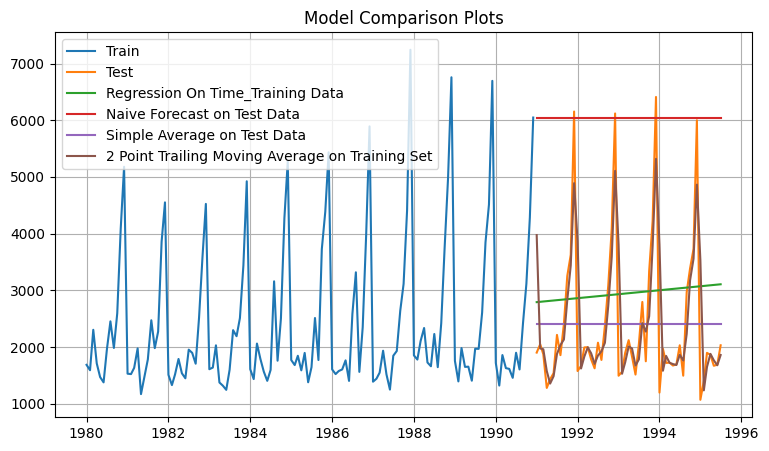

In [636]:
plt.plot(train['Sparkling'],label='Train')
plt.plot(test['Sparkling'],label='Test')
plt.plot(lr_test['RegOnTime'],label='Regression On Time_Training Data')
plt.plot(nm_test['Naive'],label='Naive Forecast on Test Data')
plt.plot(sa_test['Mean_Forecast'],label='Simple Average on Test Data')
plt.plot(trailing_ma_test['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05. - 4 points

In [637]:
from statsmodels.tsa.stattools import adfuller

Dicky-Fuller Test is used to check if a time series is stationary or non-stationary.

Null Hypothesis=Time Series is non-stationary.

Alternate Hypothesis=Time Series is stationary.

In [638]:
print(f"test statistic={adfuller(df)[0]}\np-value={adfuller(df)[1]}")

test statistic=-1.3604974548123372
p-value=0.6010608871634854


The p-value is higher than 0.05 significance level, hence failing to reject the null hypothesis that the time series is non-stationary. 
###### It is concluded by the Dicky-Fuller Test that the time series is non-stationary.

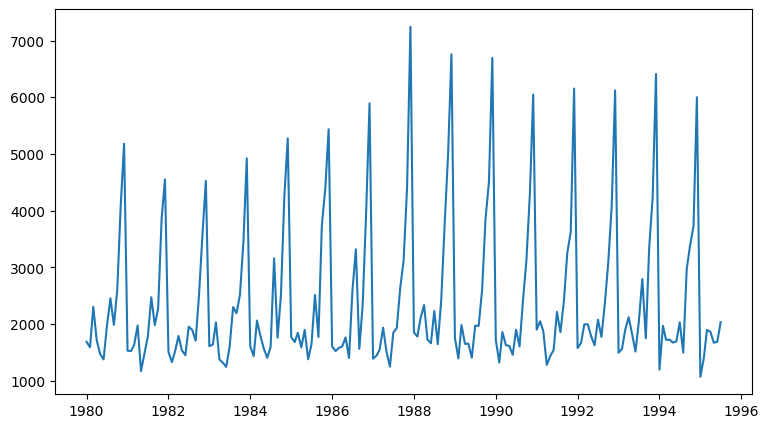

In [639]:
plt.plot(df);

In [640]:
# defining a function to visualize the time series and check stationarity with Dicky-Fuller Test
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()  
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

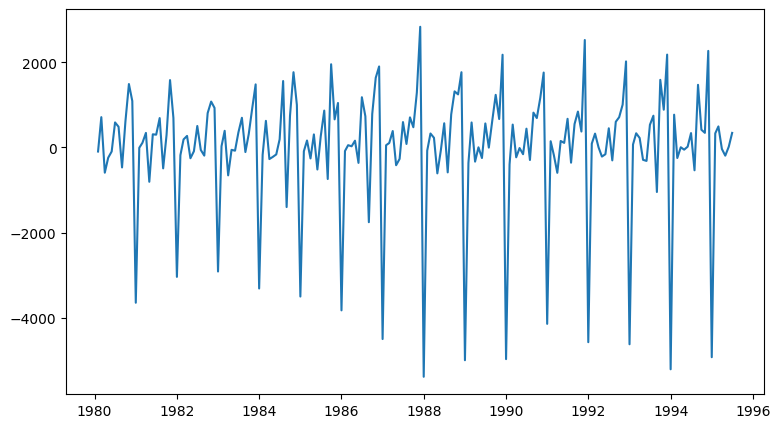

In [641]:
plt.plot(df['Sparkling'].diff(periods=1));

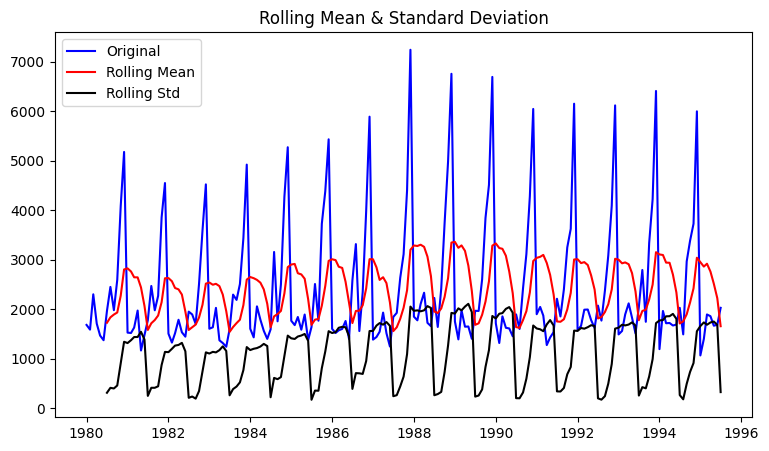

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [642]:
test_stationarity(df['Sparkling'])

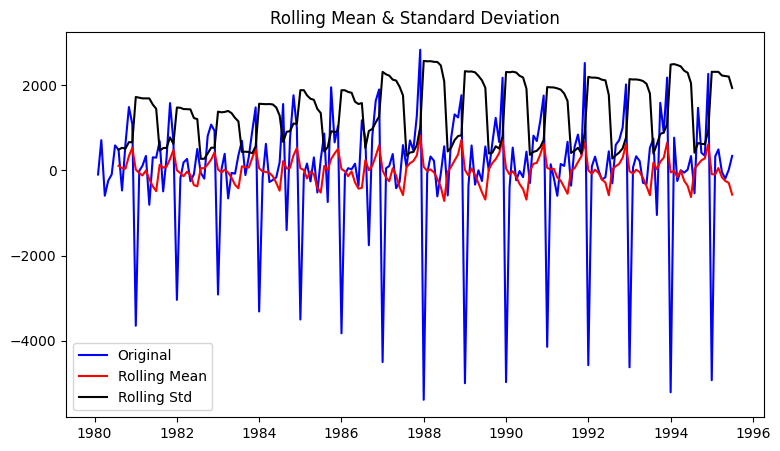

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [643]:
test_stationarity(df['Sparkling'].diff(periods=1).dropna())

After differencing the time series, the p-value is 0.0000 which is lower than 0.05 significance level. Therefore, we can successfully reject the null hypothesis that the time series is non-stationary. 

#### The time series is now stationary.

#### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE. - 11 points

In [644]:
from sklearn.metrics import  mean_squared_error
import itertools

In [645]:
train_stat=train['Sparkling'].diff(periods=1).dropna()

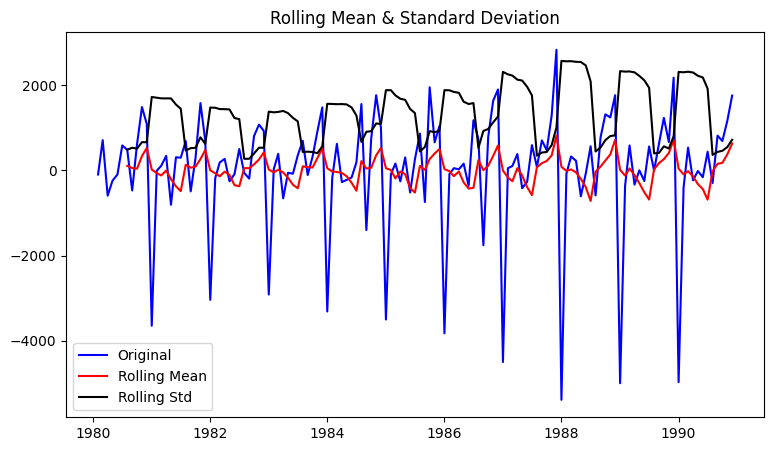

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [646]:
test_stationarity(train_stat)

In [647]:
# converted train set into stationary

In [648]:
p=range(1,4)
d=range(0,1)
q=range(1,4)

# creating parameter combinations for ARIMA model
pdq=list(itertools.product(p,d,q))

In [649]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [650]:
ARIMA_AIC=pd.DataFrame(columns=['param','AIC'])
ARIMA_AIC

,param,AIC


In [651]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
for param in pdq:
    ARIMA_model=ARIMA(train['Sparkling'].values,order=param).fit()
    print(f'ARIMA{param} - AIC:{ARIMA_model.aic}')
    ARIMA_AIC=ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic},ignore_index=True)

ARIMA(1, 0, 1) - AIC:2246.005399728355
ARIMA(1, 0, 2) - AIC:2246.9357004523513
ARIMA(1, 0, 3) - AIC:2242.1061234118706
ARIMA(2, 0, 1) - AIC:2236.590860155876
ARIMA(2, 0, 2) - AIC:2248.277280694339
ARIMA(2, 0, 3) - AIC:2205.7711225412154
ARIMA(3, 0, 1) - AIC:2248.562804183012
ARIMA(3, 0, 2) - AIC:2235.191615818506
ARIMA(3, 0, 3) - AIC:2209.3787074978945


In [652]:
ARIMA_AIC.sort_values(by='AIC')

,param,AIC
5,"(2, 0, 3)",2205.771123
8,"(3, 0, 3)",2209.378707
7,"(3, 0, 2)",2235.191616
3,"(2, 0, 1)",2236.590860
2,"(1, 0, 3)",2242.106123
0,"(1, 0, 1)",2246.005400
1,"(1, 0, 2)",2246.935700
4,"(2, 0, 2)",2248.277281
6,"(3, 0, 1)",2248.562804


In [653]:
auto_ARIMA=ARIMA(train['Sparkling'],order=(2,0,3))
result_auto_ARIMA=auto_ARIMA.fit()
print(result_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1095.886
Date:                Sun, 04 Jun 2023   AIC                           2205.771
Time:                        21:09:46   BIC                           2225.951
Sample:                    01-01-1980   HQIC                          2213.971
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2403.7508    131.266     18.312      0.000    2146.475    2661.026
ar.L1          1.7076      0.047     36.679      0.000       1.616       1.799
ar.L2         -0.9713      0.047    -20.771      0.0

In [654]:
auto_ARIMA_pred=result_auto_ARIMA.forecast(steps=len(test))

In [655]:
rmse_auto_ARIMA=mean_squared_error(test['Sparkling'],auto_ARIMA_pred,squared=False)

In [656]:
result_auto_ARIMA_temp=pd.DataFrame({'Test RMSE': [rmse_auto_ARIMA],'p':[2],'d':[1],'q':[3]}
                           ,index=['AutoARIMAModel(2,1,3)'])
result_auto_ARIMA= pd.concat([result_trailing_test,result_auto_ARIMA_temp])
result_auto_ARIMA

,Test RMSE,p,d,q
Alpha=0.07; SES,1338.008384,NaN,NaN,NaN
"Alpha=0.66, Beta=0.0001; DES",5291.879833,NaN,NaN,NaN
"Alpha=0.11, Beta=0.01, Gamma=0.461; TES",378.951023,NaN,NaN,NaN
RegressionOnTime,1389.135175,NaN,NaN,NaN
NaiveModel,3864.279352,NaN,NaN,NaN
SimpleAverageModel,1275.081804,NaN,NaN,NaN
2pointTrailingMovingAverage,813.400684,NaN,NaN,NaN
4pointTrailingMovingAverage,1156.589694,NaN,NaN,NaN
6pointTrailingMovingAverage,1283.927428,NaN,NaN,NaN
9pointTrailingMovingAverage,1346.278315,NaN,NaN,NaN


In [657]:
# SARIMA model
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [658]:
seasonal_pdq

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12)]

In [659]:
SARIMA_AIC=pd.DataFrame(columns=['param','seasonal','AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [660]:
train_stat=train['Sparkling'].diff(periods=1).dropna()

In [661]:
import statsmodels.api as sm

#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        SARIMA_model=sm.tsa.statespace.SARIMAX(train_stat,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)  
#        results_SARIMA = SARIMA_model.fit(maxiter=1000)
#        print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
#        SARIMA_AIC=SARIMA_AIC.append({'param':param,'seasonal':param_seasonal,'AIC':results_SARIMA.aic},ignore_index=True)

In [662]:
#SARIMA_AIC.sort_values(by='AIC')

In [663]:
# building SARIMA model with the lowest AIC
auto_SARIMA_12_1=sm.tsa.statespace.SARIMAX(train_stat,
                                order=(3,0,2),
                                seasonal_order=(2,0,3,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12_1=auto_SARIMA_12_1.fit(maxiter=1000)

In [664]:
print(results_auto_SARIMA_12_1.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                  Sparkling   No. Observations:                  131
Model:             SARIMAX(3, 0, 2)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -334.942
Date:                                    Sun, 04 Jun 2023   AIC                            691.884
Time:                                            21:09:55   BIC                            719.623
Sample:                                        02-01-1980   HQIC                           703.080
                                             - 12-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6879      0.715     -0.963      0

In [665]:
# predicting test values with the final model
predicted_auto_SARIMA_12_1=results_auto_SARIMA_12_1.get_forecast(steps=len(test))

In [666]:
rmse_auto_SARIMA_1=mean_squared_error(test,predicted_auto_SARIMA_12_1.predicted_mean,squared=False)
print(rmse_auto_SARIMA_1)

1119563837705146.1


In [667]:
# building SARIMA model with the lowest AIC
auto_SARIMA_12=sm.tsa.statespace.SARIMAX(train_stat,
                                order=(3,0,2),
                                seasonal_order=(3,0,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12=auto_SARIMA_12.fit(maxiter=1000)

In [668]:
print(results_auto_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  131
Model:             SARIMAX(3, 0, 2)x(3, 0, [1], 12)   Log Likelihood                -684.845
Date:                              Sun, 04 Jun 2023   AIC                           1389.690
Time:                                      21:10:16   BIC                           1414.907
Sample:                                  02-01-1980   HQIC                          1399.868
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5225      0.449     -1.165      0.244      -1.402       0.357
ar.L2         -0.03

In [669]:
# predicting test values with the final model
predicted_auto_SARIMA_12=results_auto_SARIMA_12.get_forecast(steps=len(test))

In [670]:
predicted_auto_SARIMA_12.summary_frame().head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,-4736.610769,410.623179,-5541.417410,-3931.804128
1991-02-01,-37.915558,512.123774,-1041.659711,965.828596
1991-03-01,308.665232,522.868386,-716.137973,1333.468437
1991-04-01,6.906194,530.657086,-1033.162583,1046.974971
1991-05-01,-216.024663,534.417131,-1263.462993,831.413668


In [671]:
test.isnull().sum()

Sparkling    0
dtype: int64

In [672]:
rmse_auto_SARIMA=mean_squared_error(test,predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse_auto_SARIMA)

2913.3196418258317


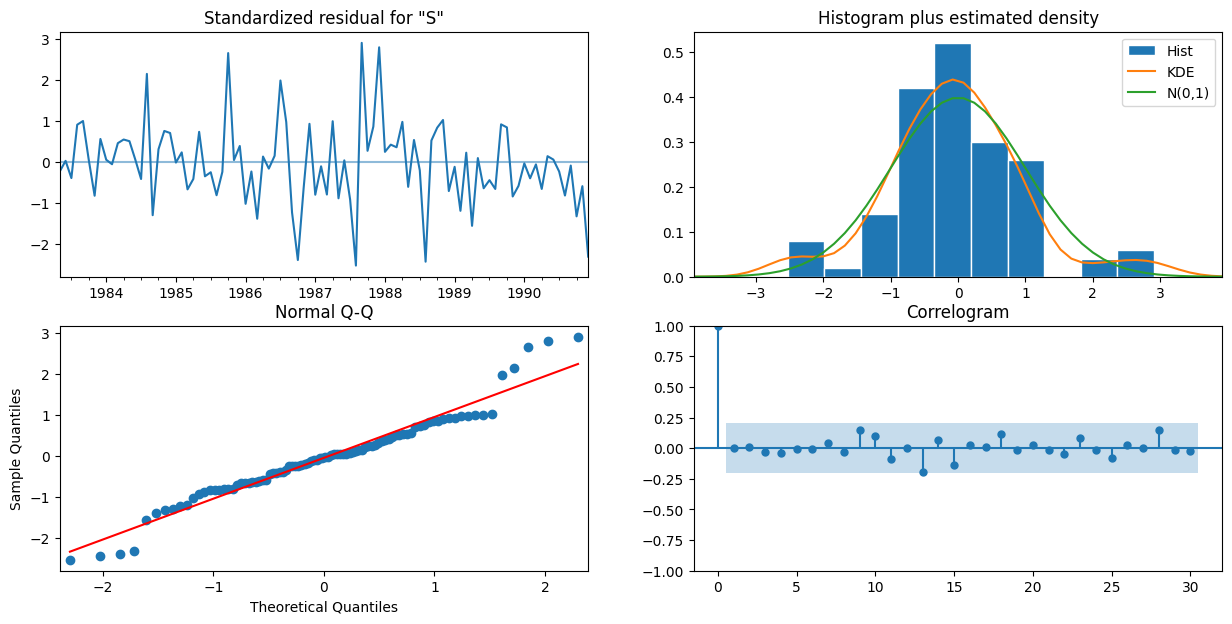

In [673]:
results_auto_SARIMA_12.plot_diagnostics(lags=30,figsize=(15,7));

#### 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data. - 2 points

In [674]:
result_auto_SARIMA_temp=pd.DataFrame({'Test RMSE':[rmse_auto_SARIMA],'p':[3],'d':[0],'q':[2]
                                      ,'P':[3],'D':[0],'Q':[1],'F':[12]}
                           ,index=['AutoSARIMAModel(3,0,1,12)'])
result_auto_SARIMA= pd.concat([result_auto_ARIMA,result_auto_SARIMA_temp])
result_auto_SARIMA

,Test RMSE,p,d,q,P,D,Q,F
Alpha=0.07; SES,1338.008384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Alpha=0.66, Beta=0.0001; DES",5291.879833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Alpha=0.11, Beta=0.01, Gamma=0.461; TES",378.951023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RegressionOnTime,1389.135175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaiveModel,3864.279352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SimpleAverageModel,1275.081804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2pointTrailingMovingAverage,813.400684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4pointTrailingMovingAverage,1156.589694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6pointTrailingMovingAverage,1283.927428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9pointTrailingMovingAverage,1346.278315,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands. - 3 points

In [675]:
# triple exponential smoothing has by far given the lowest RMSE
# building TES as our final model to predict 12 months into the future

In [676]:
# creating TES model on the full data
model_final=ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')
model_final_autofit=model_final.fit()

In [677]:
model_final_autofit.params

{'smoothing_level': 0.07596713146311772,
 'smoothing_trend': 0.03256921715086211,
 'smoothing_seasonal': 0.37660762886165167,
 'damping_trend': nan,
 'initial_level': 2356.500087258337,
 'initial_trend': -0.8449338106956193,
 'initial_seasons': array([-636.25474139, -723.00153617, -398.66964817, -473.45571811,
        -808.43306854, -815.37001157, -384.24814771,   73.00119661,
        -237.46281546,  272.34574748, 1541.39349329, 2590.11477306]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [678]:
# creating timestamps for the next 12 months
future_dates=pd.date_range(start=df.index.max() + pd.DateOffset(months=1), periods=12, freq='M')

# creating an empty df with the timestamps
forecast_df = pd.DataFrame(index=future_dates)
forecast_df['Sparkling'] = None
forecast_df

,Sparkling
1995-08-31,None
1995-09-30,None
1995-10-31,None
1995-11-30,None
1995-12-31,None
1996-01-31,None
1996-02-29,None
1996-03-31,None
1996-04-30,None
1996-05-31,None


In [679]:
TES_predict=model_final_autofit.forecast(len(forecast_df))
TES_predict

1995-08-01    1877.431801
1995-09-01    2405.285747
1995-10-01    3242.105698
1995-11-01    3922.189524
1995-12-01    6118.502404
1996-01-01    1262.618990
1996-02-01    1592.137914
1996-03-01    1831.652945
1996-04-01    1806.470072
1996-05-01    1651.723185
1996-06-01    1586.507708
1996-07-01    1977.014975
Freq: MS, dtype: float64

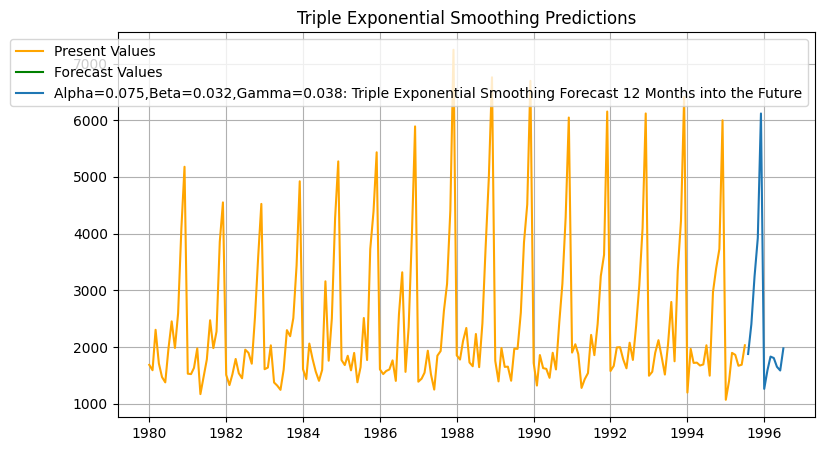

In [680]:
plt.plot(df, label='Present Values', color='orange')
plt.plot(forecast_df, label='Forecast Values', color='g')
plt.plot(TES_predict, label='Alpha=0.075,Beta=0.032,Gamma=0.038: Triple Exponential Smoothing Forecast 12 Months into the Future')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

#### 9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present. - 9 points

Added in the business report.

# THIS NOTEBOOKS ENDS HERE.